# Data Manipulation in Pandas

## Skills

1. Load data into Python using the pandas module.
2. Select columns using `[]` and rows using `DataFrame.loc[]`.
3. Summarize columns with basic descriptive statistics.
4. **Summarize by category using `DataFrame.groupby()`**
5. **Create new columns.**
6. **Use built-in Pandas string manipulation functions.**
7. Visualize data using Seaborn and Matplotlib.

## Vocabulary List

**indicator variable**. A column in a dataset which takes on only *True/False* values. More specifically, we will be using indicator variables in this class to store information about another column, for example:

* "Is this person taller than 6'?" is a summary of another column, a peron's height.
* "Is this movie over 2 hours long?" is a summary of another column, the length of a movie.

## Preliminaries

Run the following code to load in the *pandas* and *matplotlib.pyplot* libraries, as well as load in the Netflix dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/netflix.csv")

netflix.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8


## The `.groupby()` Function

Often, we won't just want overall statistics, but statistics for each category. For example, we might ask whether movies or TV shows tend to have higher IMDB user ratings. We *can* calculate this with the skills from the previous notebook, but it is rather tedious.

First, we select all movies, and calculate their average IMDB score:

In [ ]:
netflix.query("type == 'MOVIE'")["imdb_score"].mean() #The netflix data has shows and movies
#And maybe we wanna split it up to see movies and see their average imdb score for example

#Doing this for every single category is super tedious

6.26779312371437

Then, we select all TV shows, and calculate their average IMDB score:

In [ ]:
netflix.query("type == 'SHOW'")["imdb_score"].mean()



7.017813333333333

Now imagine doing this when there are 5, 10, or even more categories, for example: what is the average IMDB user rating for movies from each year. Clearly this is inconvenient!

The `DataFrame.groupby()` gives us a way to do this quickly and efficiently. `.groupby()` tells python to not consider individual entries in the dataframe, but to group them up based on one particular column. Since we want to get the average IMDB score based on whether it's a movie or TV show, we'll group by the `type` column:

In [ ]:
netflix.groupby("type") #Telling pandas to group entries by individual columns


There is no output when you use `.groupby()`. Instead, *pandas* is waiting for us to run some summary function on it, for example:

In [ ]:
netflix.groupby("type").mean() #Now itll take the mean for each individual group

<ipython-input-8-9a4dfb0d6408>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  netflix.groupby("type").mean() #Now itll take the mean for each individual group


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
type,,,,,,,
MOVIE,2015.366036,98.887497,NaN,6.267793,26706.818772,18.930634,6.449033
SHOW,2017.187040,38.839470,2.169858,7.017813,17494.873067,29.281064,7.507016


Since we were interested in just the IMDB user score, we can just select that one column using the indexing brackets `[]`, and we're done:

In [ ]:
netflix.groupby("type").mean()["imdb_score"]

<ipython-input-9-3824c6951f9f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  netflix.groupby("type").mean()["imdb_score"]


type
MOVIE    6.267793
SHOW     7.017813
Name: imdb_score, dtype: float64

**Example.** As suggested above, let's calculate the average IMDB rating for movies, broken down by release year. So first, we'll narrow down the Netflix titles to movies only:

In [ ]:
movies = netflix[ netflix["type"] == "MOVIE" ]

Then, we'll group by year released:

> `movies.groupby("release_year")`

And then calculate the mean IMDB ratings:

In [ ]:
movies.groupby("release_year")["imdb_score"].mean()

release_year
1953    6.800000
1954    7.450000
1956    6.700000
1958    7.500000
1959    6.700000
          ...   
2018    6.212108
2019    6.237527
2020    6.060741
2021    6.031630
2022    5.968889
Name: imdb_score, Length: 66, dtype: float64

As a preview of next time, let's actually plot those to see if theres a trend in ratings over time:

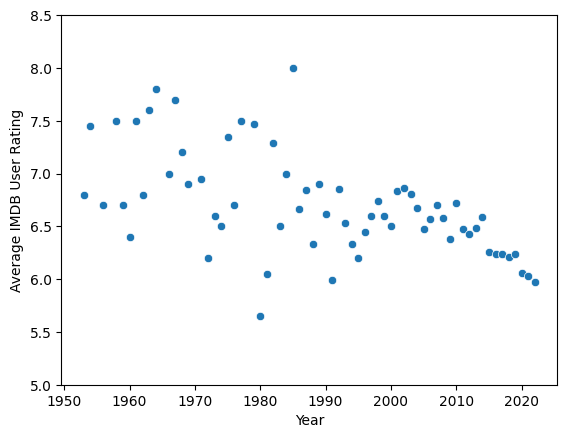

In [ ]:
# Calculate ratings and put in a variable
ratings = movies.groupby("release_year")["imdb_score"].mean()

# Make a plot
sns.scatterplot(x=ratings.index, y=ratings)

plt.ylim(5, 8.5)
plt.xlabel("Year")
plt.ylabel("Average IMDB User Rating")

plt.show()

It looks like there's quite a bit of scatter before the year 1990, but there's a slow downward trend in the average user rating over time.

This could be due to many reasons, which we cannot tell from the plot:
* Netflix only purchases older movies if they're very good
* The newest movies are all Netflix originals, which may not be as good as theatrical releases.
* Movies are getting worse over time.
* IMDB users love old movies.

## Modifying and Creating New Columns

Rarely will a dataset have all of the information in it that we want already available. Looking at the Netflix dataset:

* We have total runtime in minutes, but may want to break it down into hours and minutes.
* Instead of IMDB and TMDB scores separately, we may want the average scores.
* A column which indicates whether a movie was made this century, or if it is from the US or is "foreign."
* The production countries and genres are lists, while it would be much easier to have only a single value per column.
* When we get further into text analysis, we'll want to tokenize the descriptions and titles, rather than leaving them as strings.

Other issues we may see in other datasets may include:

* Columns with dollar amounts will often be read in as strings (e.g. "$4.25") and need to be converted to floating-point numbers (4.25).
* We may want to split full names into first and last names, or remove titles like "Dr." or "Mr." from them.

Let's start by adding a new column telling us the runtime of a movie or show in hours. The following code does this:

In [ ]:
netflix["runtime_hours"] = netflix["runtime"] // 60

As you can see, adding a new column based on another one is simple: you just pretend that it already exists, and assign it a value. You can do standard mathematical operations (`+`, `-`, `*`, `/`, `//`, `%`), combining multiple columns as necessary. In this case, we used integer division `//` to divide the runtime in minutes by 60, and dropped any remainder.

There is now a `runtime_hours` column in our DataFrame:

In [ ]:
netflix.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'runtime_hours'],
      dtype='object')

We can also add a `runtime_minutes` column, and make sure that everything is working as we expect.

In [ ]:
netflix["runtime_minutes"] = netflix["runtime"] % 60

netflix[ ["runtime", "runtime_hours", "runtime_minutes"] ].head(10)

,runtime,runtime_hours,runtime_minutes
0,48,0,48
1,113,1,53
2,91,1,31
3,94,1,34
4,133,2,13
5,30,0,30
6,102,1,42
7,170,2,50
8,104,1,44
9,110,1,50


**Example.** Let's add a column which is the average review score, rather than keeping both the IMDB and TMDB user scores.

In [ ]:
netflix["score"] = ( netflix["imdb_score"] + netflix["tmdb_score"] ) / 2

netflix[ ["imdb_score", "tmdb_score", "score"] ].head(6)

**Example.** Let's add an **indicator column** about the length of titles on Netflix which tells us which ones are "long." For our purposes, we'll consider a movie is "long" if it is over 2 hours in length.

Indicator columns can be added by writing any logical expression about another column, using `>`, `<`, `==`, `!=`, `>=`, `<=` and so on.

In [ ]:
netflix["is_long"] = netflix["runtime_hours"] >= 2

In [ ]:
netflix[ ["runtime", "is_long"] ].head(6)

This indicator column is useful because we can now see if longer movies have different ratings from shorter movies:

In [ ]:
movies = netflix.loc[ netflix["type"] == "MOVIE" ]
movies.groupby("is_long").describe()["score"]

It looks like they're quite similar.

**Example.** Let's add an indicator column telling us whether a title is highly rated. Looking at the statistics for movies, it appears that 75% of all titles have a rating of 7.40 or lower, so we'll use that as the cut-off between regular movies and "highly-rated" ones.

In [ ]:
netflix.describe()["score"]

In [ ]:
netflix["highly_rated"] = netflix["score"] > 7.4

In [ ]:
netflix[ ["score", "highly_rated"] ].head(8)

## Built-In DataFrame Functions

The above section applies if you're using Python's built-in mathematical operators (`+`, `-`, and so on) and logical operators (`<`, `>`, &c.). But most of the functions for string manipulation we've used and will be using *will not work*. The reason is simple, but not obvious if you're not very familiar with Python: these functions are designed to work on a single string, float, or whatever, but not for a list or Series of them.

Consider the following, which works:

In [ ]:
str.lower("HELLO")

And this, which does not:

In [ ]:
str.lower(["HELLO", "HOW", "ARE", "YOU"])

Similarly, this also produces an error because, like *lists*, a Pandas *Series* object is a collection of values:

In [ ]:
str.lower(netflix["title"])

There are two solutions to this problem:
* Pandas has many built-in functions which duplicate string functions we've already seen. A complete list can be found [in the documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lower.html)
* Use the `Series.apply()` method, which is much more flexible, allowing for arbitrary kinds of data manipulation, but is also more complicated.

Let's look over a few useful built-in string functions in Pandas.

First, the solution to the above example is to use `Series.str.lower()`:

In [ ]:
netflix["title"].str.lower()

**Example.** How long are titles of shows on Netflix?

This is a straightforward application of the `Series.str.len()` function. Let's start by calculating lengths

In [ ]:
netflix["title"].str.len()

Now that we have this, we can simply use `.describe()` to calculate typical values:

In [ ]:
netflix["title"].str.len().describe()

The mean length is 18 characters. The longest title is 104 characters, while the shortest is 1 character long. What are these? To do this, we use `.loc[]`.

In [ ]:
netflix["title"].loc[ netflix["title"].str.len() == 1 ]

In [ ]:
netflix["title"].loc[ netflix["title"].str.len() == 104 ]

**Example.** How many dramas and comedies are on Netflix?

The `Series.str.contains()` function will indicate whether a string contains text, similar to `.find()`. We can use this on the *genres* columns to convert them to indicators.

In [ ]:
netflix["genres"]

In [ ]:
netflix["is_comedy"] = netflix["genres"].str.contains("comedy")
netflix["is_drama"]  = netflix["genres"].str.contains("drama")

In [ ]:
netflix[ ["genres", "is_comedy", "is_drama"] ].head(5)

And then count them. It looks like over 900 of the titles are *both* comedy and drama!

In [ ]:
netflix.value_counts(["is_comedy", "is_drama"])

### Using `Series.apply()`

`apply` allows you to apply any function to a column in your dataframe. For example, we could use `str.lower` to make a column entirely lowercase.

*Note:* when using `apply`, don't include the parentheses on the function you're applying. This tells Python you want to tell the `apply` method to *use* your function, rather evaluate the function. `max` is a function, while `max(3,4)` *is* the integer `3`.

In [ ]:
netflix["title"].apply(str.lower)

Why would we do this when this function already exists in Pandas? Well, you wouldn't. `apply` is useful when no such function already exists. For example, here's a simple function that adds an exclamation point to the end of a string, and also makes it all caps:

In [ ]:
def make_exclamation(text):
    return str.upper(text) + "!"

In [ ]:
make_exclamation("hello there")

We can apply this function to the titles in our dataset:

In [ ]:
netflix["title"].apply(make_exclamation)